In [1]:
import re
import string
import numpy as np
from unicodedata import normalize
from nltk import word_tokenize

def load_file(path: str):
    """ Loads the file into memory """
    with open(path, 'r', encoding='utf8') as fo:
        content = fo.read()
    return content

def clean_data(content: str):
    """ Cleans the data for tokenization """
    # Lowercase text and remove leading and ending newlines
    text = content.lower().strip('\n')
    # Fix any encoding issues
    text = normalize('NFD', text).encode('utf8')
    text = text.decode('utf8')
    # Match by paragraphs (at least two new lines)
    par_match = re.compile(r'\n{2,}')
    lines = par_match.split(text)
    cleaned = list()
    for line in lines:
        # Remove new line symbols
        line = line.replace('\n', ' ')
        # Remove special characters and numbers
        line = re.sub("[^a-z\s\']+", " ", line).replace("'", "")
        # Remove line with < 15 words
        line = line.split()
        if len(line) > 15:
          # Remove whitespace
          line = ' '.join(line)
          cleaned.append(line)
    return np.array(cleaned)

In [2]:
fyodor = load_file('q1/28054-0.txt')
f_data = clean_data(fyodor)
f_labels = np.zeros(f_data.shape[0])
f_data[0:10], f_labels[0:10]

(array(['this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with almost no restrictions whatsoever you may copy it give it away or re use it under the terms of the project gutenberg license included with this ebook or online at http www gutenberg org license if you are not located in the united states you ll have to check the laws of the country where you are located before using this ebook',
        'part i book i the history of a family chapter i fyodor pavlovitch karamazov chapter ii he gets rid of his eldest son chapter iii the second marriage and the second family chapter iv the third son alyosha chapter v elders book ii an unfortunate gathering chapter i they arrive at the monastery chapter ii the old buffoon chapter iii peasant women who have faith chapter iv a lady of little faith chapter v so be it so be it chapter vi why is such a man alive chapter vii a young man bent on a career chapter viii the scandalous scen

In [3]:
doyle = load_file('q1/pg1661.txt')
d_data = clean_data(doyle)
d_labels = np.ones(d_data.shape[0])
d_data[0:10], d_labels[0:10]

(array(['this ebook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever you may copy it give it away or re use it under the terms of the project gutenberg license included with this ebook or online at www gutenberg net',
        'i a scandal in bohemia ii the red headed league iii a case of identity iv the boscombe valley mystery v the five orange pips vi the man with the twisted lip vii the adventure of the blue carbuncle viii the adventure of the speckled band ix the adventure of the engineers thumb x the adventure of the noble bachelor xi the adventure of the beryl coronet xii the adventure of the copper beeches',
        'to sherlock holmes she is always the woman i have seldom heard him mention her under any other name in his eyes she eclipses and predominates the whole of her sex it was not that he felt any emotion akin to love for irene adler all emotions and that one particularly were abhorrent to his cold precise but admirably balanced mind 

In [4]:
austen = load_file('q1/pg31100.txt')
a_data = clean_data(austen)
a_labels = np.ones(a_data.shape[0]) + 1
a_data[0:20], a_labels[0:20]

(array(['this ebook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever you may copy it give it away or re use it under the terms of the project gutenberg license included with this ebook or online at www gutenberg org',
        'note the accompanying html file has active links to all the volumes and chapters in this set',
        'sir walter elliot of kellynch hall in somersetshire was a man who for his own amusement never took up any book but the baronetage there he found occupation for an idle hour and consolation in a distressed one there his faculties were roused into admiration and respect by contemplating the limited remnant of the earliest patents there any unwelcome sensations arising from domestic affairs changed naturally into pity and contempt as he turned over the almost endless creations of the last century and there if every other leaf were powerless he could read his own history with an interest which never failed this was the page at

In [5]:
data = np.hstack((f_data, d_data))
data = np.hstack((data, a_data))

n = f_data.shape[0] + d_data.shape[0] + a_data.shape[0]
assert data.shape[0] == n

labels = np.hstack((f_labels, d_labels))
labels = np.hstack((labels, a_labels))

assert labels.shape[0] == n
data[0:10], labels[0:10]

(array(['this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with almost no restrictions whatsoever you may copy it give it away or re use it under the terms of the project gutenberg license included with this ebook or online at http www gutenberg org license if you are not located in the united states you ll have to check the laws of the country where you are located before using this ebook',
        'part i book i the history of a family chapter i fyodor pavlovitch karamazov chapter ii he gets rid of his eldest son chapter iii the second marriage and the second family chapter iv the third son alyosha chapter v elders book ii an unfortunate gathering chapter i they arrive at the monastery chapter ii the old buffoon chapter iii peasant women who have faith chapter iv a lady of little faith chapter v so be it so be it chapter vi why is such a man alive chapter vii a young man bent on a career chapter viii the scandalous scen

In [6]:
from keras.utils import to_categorical

labels = to_categorical(labels)

assert labels.shape[0] == n
labels.shape

(14068, 3)

In [7]:
n_train = int(data.shape[0] * .8)
n_val = int(data.shape[0] * .2)

indices = np.random.permutation(range(data.shape[0]))
train_indices = indices[:n_train-n_val]
val_indices = indices[n_train-n_val:n_train]
test_indices = indices[n_train:]

X_train, y_train = data[train_indices], labels[train_indices]
X_val, y_val = data[val_indices], labels[val_indices]
X_test, y_test = data[test_indices], labels[test_indices]

assert X_train.shape[0] + X_val.shape[0] + X_test.shape[0] == n
assert y_train.shape[0] + y_val.shape[0] + y_test.shape[0] == n

X_train[20:25]

array(['close to you murmured mitya kissing her dress her bosom her hands and suddenly he had a strange fancy it seemed to him that she was looking straight before her not at him not into his face but over his head with an intent almost uncanny fixity an expression of wonder almost of alarm came suddenly into her face',
       'an hours complete leisure for such reflections as these on a dark november day a small thick rain almost blotting out the very few objects ever to be discerned from the windows was enough to make the sound of lady russells carriage exceedingly welcome and yet though desirous to be gone she could not quit the mansion house or look an adieu to the cottage with its black dripping and comfortless veranda or even notice through the misty glasses the last humble tenements of the village without a saddened heart scenes had passed in uppercross which made it precious it stood the record of many sensations of pain once severe but now softened and of some instances of rel

In [8]:
max_seq_length = max(len(line.split()) for line in data)
max_seq_length

2681

In [9]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
seqs = tokenizer.texts_to_sequences(X_train)
X_train_pad = pad_sequences(seqs, maxlen=max_seq_length, padding='post')

In [10]:
X_train_pad.shape, X_train_pad[0:10]

((8441, 2681),
 array([[  43,    8,    5, ...,    0,    0,    0],
        [ 214,   65,   78, ...,    0,    0,    0],
        [ 291, 1693,  926, ...,    0,    0,    0],
        ...,
        [  43,   24,    1, ...,    0,    0,    0],
        [   7,    6,  219, ...,    0,    0,    0],
        [   7, 6960,   21, ...,    0,    0,    0]], dtype=int32))

In [11]:
seqs = tokenizer.texts_to_sequences(X_val)
X_val_pad = pad_sequences(seqs, maxlen=max_seq_length, padding='post')

seqs = tokenizer.texts_to_sequences(X_val)
X_test_pad = pad_sequences(seqs, maxlen=max_seq_length, padding='post')

X_val_pad.shape, X_test_pad.shape

((2813, 2681), (2813, 2681))

In [12]:
!wget http://nlp.stanford.edu/data/glove.6B.zip -O /tmp/glove.6B.zip
!unzip -q /tmp/glove.6B.zip

--2021-04-23 22:18:52--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-04-23 22:18:52--  https://nlp.stanford.edu/data/glove.6B.zip
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-04-23 22:18:53--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 

In [14]:
embeddings_index = {}
with open("/tmp/glove.6B.100d.txt") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [16]:
num_tokens = len(tokenizer.word_index) + 2
embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 16805 words (1162 misses)


In [17]:
from keras.layers import Embedding, Conv1D, ZeroPadding1D, Dense, GlobalMaxPooling1D
from keras.models import Sequential
from keras.initializers import Constant

cnn_model = Sequential()
cnn_model.add(
    Embedding(
        num_tokens,
        embedding_dim,
        embeddings_initializer=Constant(embedding_matrix),
        trainable=False,
        input_length=max_seq_length
    )
)
cnn_model.add(ZeroPadding1D(3))
cnn_model.add(Conv1D(128, 4, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(3, activation='softmax'))
cnn_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2681, 100)         1796900   
_________________________________________________________________
zero_padding1d (ZeroPadding1 (None, 2687, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 2684, 128)         51328     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 1,856,679
Trainable params: 59,779
Non-trainable params: 1,796,900
_________________________________________

In [18]:
from keras.metrics import Precision, Recall
from keras.optimizers import Adam
cnn_model.compile(optimizer=Adam(lr=1E-3), loss='categorical_crossentropy', 
                  metrics=['acc', Precision(), Recall()])

history = cnn_model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val),
                        batch_size=32, epochs=10)

Epoch 1/10
264/264 [==============================] - 7s 15ms/step - loss: 0.5854 - acc: 0.7635 - precision: 0.7924 - recall: 0.7266 - val_loss: 0.2373 - val_acc: 0.9097 - val_precision: 0.9361 - val_recall: 0.8905
Epoch 2/10
264/264 [==============================] - 3s 13ms/step - loss: 0.1583 - acc: 0.9436 - precision: 0.9554 - recall: 0.9324 - val_loss: 0.1948 - val_acc: 0.9271 - val_precision: 0.9402 - val_recall: 0.9172
Epoch 3/10
264/264 [==============================] - 3s 13ms/step - loss: 0.0983 - acc: 0.9687 - precision: 0.9729 - recall: 0.9616 - val_loss: 0.3087 - val_acc: 0.9019 - val_precision: 0.9074 - val_recall: 0.8987
Epoch 4/10
264/264 [==============================] - 3s 13ms/step - loss: 0.0546 - acc: 0.9835 - precision: 0.9849 - recall: 0.9817 - val_loss: 0.2384 - val_acc: 0.9239 - val_precision: 0.9278 - val_recall: 0.9186
Epoch 5/10
264/264 [==============================] - 3s 13ms/step - loss: 0.0240 - acc: 0.9957 - precision: 0.9965 - recall: 0.9947 - val_l

In [19]:
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(Embedding(
        num_tokens,
        embedding_dim,
        embeddings_initializer=Constant(embedding_matrix),
        trainable=False,
        input_length=max_seq_length
))
lstm_model.add(LSTM(256, return_sequences=True))
lstm_model.add(GlobalMaxPooling1D())
lstm_model.add(Dense(128, activation='relu'))
lstm_model.add(Dense(3, activation='softmax'))
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2681, 100)         1796900   
_________________________________________________________________
lstm (LSTM)                  (None, 2681, 256)         365568    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 387       
Total params: 2,195,751
Trainable params: 398,851
Non-trainable params: 1,796,900
_________________________________________________________________


In [20]:
lstm_model.compile(optimizer=Adam(lr=1E-3), loss='categorical_crossentropy', 
                  metrics=['acc', Precision(), Recall()])

history = lstm_model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val),
                         batch_size=32, epochs=10)

Epoch 1/10
264/264 [==============================] - 27s 99ms/step - loss: 0.6474 - acc: 0.7291 - precision_1: 0.7707 - recall_1: 0.6894 - val_loss: 0.2344 - val_acc: 0.9086 - val_precision_1: 0.9315 - val_recall_1: 0.8891
Epoch 2/10
264/264 [==============================] - 26s 97ms/step - loss: 0.2054 - acc: 0.9229 - precision_1: 0.9393 - recall_1: 0.9096 - val_loss: 0.1851 - val_acc: 0.9264 - val_precision_1: 0.9397 - val_recall_1: 0.9140
Epoch 3/10
264/264 [==============================] - 26s 98ms/step - loss: 0.1434 - acc: 0.9466 - precision_1: 0.9559 - recall_1: 0.9375 - val_loss: 0.1682 - val_acc: 0.9353 - val_precision_1: 0.9442 - val_recall_1: 0.9257
Epoch 4/10
264/264 [==============================] - 26s 97ms/step - loss: 0.0904 - acc: 0.9676 - precision_1: 0.9744 - recall_1: 0.9626 - val_loss: 0.1695 - val_acc: 0.9332 - val_precision_1: 0.9382 - val_recall_1: 0.9289
Epoch 5/10
264/264 [==============================] - 26s 98ms/step - loss: 0.0494 - acc: 0.9863 - preci

In [21]:
lstm_model = Sequential()
lstm_model.add(Embedding(
        num_tokens,
        embedding_dim,
        embeddings_initializer=Constant(embedding_matrix),
        trainable=False,
        input_length=max_seq_length
))
lstm_model.add(LSTM(256, return_sequences=False))
lstm_model.add(Dense(128, activation='relu'))
lstm_model.add(Dense(3, activation='softmax'))
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 2681, 100)         1796900   
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               365568    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 387       
Total params: 2,195,751
Trainable params: 398,851
Non-trainable params: 1,796,900
_________________________________________________________________


In [22]:
lstm_model.compile(optimizer=Adam(lr=1E-3), loss='categorical_crossentropy', 
                  metrics=['acc', Precision(), Recall()])

history = lstm_model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val),
                         batch_size=32, epochs=10)

Epoch 1/10
264/264 [==============================] - 27s 99ms/step - loss: 1.0677 - acc: 0.6082 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 0.9946 - val_acc: 0.6100 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 2/10
264/264 [==============================] - 25s 96ms/step - loss: 0.9789 - acc: 0.6096 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - val_loss: 0.9413 - val_acc: 0.6100 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 3/10
264/264 [==============================] - 26s 97ms/step - loss: 0.9337 - acc: 0.6147 - precision_2: 0.5976 - recall_2: 0.5527 - val_loss: 0.9155 - val_acc: 0.6100 - val_precision_2: 0.6100 - val_recall_2: 0.6100
Epoch 4/10
264/264 [==============================] - 25s 96ms/step - loss: 0.9144 - acc: 0.6119 - precision_2: 0.6119 - recall_2: 0.6119 - val_loss: 0.9033 - val_acc: 0.6100 - val_precision_2: 0.6100 - val_recall_2: 0.6100
Epoch 5/10
264/264 [==============================] - 25s 96ms/step - lo

### Logistic Regression

In [23]:
import scipy.sparse

from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

def _insert_bias(X):
    """ Inserts the bias """
    bias = np.ones((X.shape[0], 1))
    if isinstance(X, scipy.sparse.csr.csr_matrix):
        X = np.concatenate((X.todense(), bias), axis=1)  # Insert bias into the features
        X = csr_matrix(X)
    else:
        X = np.concatenate((X, bias), axis=1)
    return X

vectorizer = TfidfVectorizer(vocabulary=tokenizer.word_index.keys())
tf_train = vectorizer.fit_transform(X_train)
tf_val = vectorizer.transform(X_val)
tf_test = vectorizer.transform(X_test)

assert tf_train.shape[0] + tf_val.shape[0] + tf_test.shape[0] == n

tf_train.shape, tf_val.shape, tf_test.shape

((8441, 17967), (2813, 17967), (2814, 17967))

In [24]:
tf_train = _insert_bias(tf_train)
tf_val = _insert_bias(tf_val)
tf_test = _insert_bias(tf_test)

tf_train.shape, tf_val.shape, tf_test.shape

((8441, 17968), (2813, 17968), (2814, 17968))

In [25]:
from typing import Tuple
import matplotlib.pyplot as plt

class LogisticRegression:
    
    def __init__(self, learning_rate: float, max_epochs: int = 1000, precision: float = 1E-6, 
                 lam: float = 1E-4, optimizer: str = 'sgd', batch_size: int = None):
        """ Initializes the class """
        self.rate = learning_rate
        self.epochs = max_epochs
        self.precision = precision
        self.lambda_ = lam
        self.b_ = batch_size
        self.alg_ = self._set_optimizer(optimizer)
        self.loss_ = None
        self.val_loss_ = None
        self.w_ = None
        
    def _set_optimizer(self, optimizer: str):
        """ Sets the optimizer to either stochastic or mini-batch stochastic gradient descent """
        optimizer = optimizer.lower().strip()
        if optimizer == 'sgd':
            return self._stochastic_descent
        elif optimizer == 'mbsgd':
            if not self.b_:
                raise ValueError("You must declare a batch size with 'batch_size' in order to use " \
                                 "mini-batch stochastic gradient descent")
            return self._mb_stochastic_descent
        else:
            raise ValueError(f"Optimizer must be of value 'sgd' or 'mbsgd'. The value {optimizer} is not valid")

    def predict(self, X: np.ndarray) -> np.ndarray:
        """ Predicts the class of the input array """
        if len(X.shape) == 1:
            X = X.reshape((1, X.shape[0]))
        phi = X.dot(self.w_)
        return np.argmax(self._softmax_batch(phi), axis=1)
    
    def score(self, X: np.ndarray, y: np.ndarray) -> float:
        """ Scores how well the Logistic model predicts """
        labels = self.predict(X)
        onehot = np.argmax(y, axis=1)
        return sum(labels == onehot) / len(y)
    
    def plot(self) -> None:
        """ Plots the loss """
        epochs = len(self.loss_)
        fig = plt.figure(figsize=(10, 5))
        plt.plot(range(epochs), self.loss_)
        if self.val_loss_:
            plt.plot(range(epochs), self.val_loss_)
        plt.title('Loss per Epoch')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()
    
    def fit(self, X: np.ndarray, y: np.ndarray, X_val: np.ndarray = None, y_val: np.ndarray = None,
            verbose: bool = True) -> None:
        """ Fits the model to the training data """
        self.loss_ = list()
        self.val_loss_ = list()
        for i in range(self.epochs):
            n, d = X.shape
            rand_indices = np.random.permutation(n)
            xi = X[rand_indices, :]
            yi = y[rand_indices, :]
            
            if self.w_ is None:
                self.w_ = np.random.normal(scale = 0.1, size = (d, yi.shape[1])) # d x k matrix
            
            loss = self.alg_(xi, yi)
            self.loss_.append(loss)
            
            val_loss = None
            if X_val is not None and y_val is not None:
                val_loss = self.loss(X_val, y_val)
                self.val_loss_.append(val_loss)
            
            if verbose:
                print(f"Loss at epoch {i} is {loss}")
                if val_loss:
                    print(f"Val Loss at epoch {i} is {val_loss}")
            
            if i > 0 and abs(self.loss_[i-1] - loss) <= self.precision:
                print(f"Precision reached at epoch {i}")
                break
                
            self.rate *= 0.9  # Decay the learning rate for stability
            
    def loss(self, X, y) -> float:
        """ Defines the loss for the model """
        phi = X.dot(self.w_)  # 1 x k vector
        softmax = self._softmax_batch(phi)  # 1 x k vector
        loss = np.sum(np.multiply(y, np.log(softmax))) 
        loss += self.lambda_ * np.sum(np.square(self.w_))  # scalar
        return -loss / X.shape[0]
        
    def _stochastic_descent(self, xi: np.ndarray, yi: np.ndarray) -> float:
        """ Implementation of stochastic gradient descent """
        n, d = xi.shape
        epoch_loss = 0.
        for k in range(n):
            x = xi[k, :]
            y = yi[k, :]
            loss, g = self._stochastic_gradient(x, y)
            epoch_loss += loss
            self.w_ -= self.rate * g
        return -epoch_loss / n
        
    def _stochastic_gradient(self, x: np.ndarray, y: np.ndarray) -> Tuple[float, np.ndarray]:
        """ Computes the stochastic gradient and its loss """
        if len(x.shape) == 1:
            x = x.reshape((1, x.shape[0]))  # 1 x d vector
        if len(y.shape) == 1:
            y = y.reshape((1, y.shape[0]))  # 1 x k vector
        
        phi = x.dot(self.w_)  # 1 x k vector
        softmax = self._softmax(phi)  # 1 x k vector
        loss = np.sum(np.multiply(y, np.log(softmax))) + (self.lambda_ * np.sum(np.square(self.w_)))  # scalar     
        g = (x.T.dot(softmax - y)) + (2 * self.lambda_ * self.w_) # d x k matrix
        return loss, g
    
    @staticmethod
    def _softmax(phi: np.ndarray) -> np.ndarray:
        """ Solves the softmax function """
        exps = np.exp(phi)
        return exps / np.sum(exps)  # k x 1 matrix

    def _mb_stochastic_descent(self, xi: np.ndarray, yi: np.ndarray) -> float:
        """ Implementation of stochastic gradient descent """
        n, d = xi.shape
        iters = int(n / self.b_)
        epoch_loss = 0.
        start = 0
        for k in range(iters):
            end = start + self.b_
            x = xi[start:end, :]
            y = yi[start:end, :]
            loss, g = self._mb_stochastic_gradient(x, y)
            epoch_loss += loss
            self.w_ -= self.rate * g
            start = end
        return -epoch_loss / iters
        
    def _mb_stochastic_gradient(self, x: np.ndarray, y: np.ndarray) -> Tuple[float, np.ndarray]:
        """ Computes the mini-batch stochastic gradient and its loss """
        phi = x.dot(self.w_)  # b x k matrix
        softmax = self._softmax_batch(phi)  # b x k matrix
        
        loss = np.sum(np.multiply(y, np.log(softmax))) 
        loss += self.lambda_ * np.sum(np.square(self.w_))  # scalar
        loss /= self.b_
        
        g = x.T.dot(softmax - y) + (2 * self.lambda_ * self.w_) # d x k matrix
        g /= self.b_
        return loss, g

    @staticmethod
    def _softmax_batch(phi: np.ndarray) -> np.ndarray:
        """ Defines row-wise softmax """
        exps = np.exp(phi)
        return exps / np.sum(exps, axis=1, keepdims=True)

In [26]:
sgdlog = LogisticRegression(0.1, max_epochs=10)
sgdlog.fit(tf_train, y_train, tf_val, y_val)

Loss at epoch 0 is 0.536602936237428
Val Loss at epoch 0 is 0.450591824035884
Loss at epoch 1 is 0.3218058211278821
Val Loss at epoch 1 is 0.3790897945018713
Loss at epoch 2 is 0.2503220439486167
Val Loss at epoch 2 is 0.3416193783457667
Loss at epoch 3 is 0.21224904751487908
Val Loss at epoch 3 is 0.32243412768507007
Loss at epoch 4 is 0.18932884789004903
Val Loss at epoch 4 is 0.31236847475850493
Loss at epoch 5 is 0.17456071878521004
Val Loss at epoch 5 is 0.30564413360740683
Loss at epoch 6 is 0.1636535583013369
Val Loss at epoch 6 is 0.3030836601393823
Loss at epoch 7 is 0.156195549059487
Val Loss at epoch 7 is 0.29854410136265613
Loss at epoch 8 is 0.15032818516529883
Val Loss at epoch 8 is 0.29646735814822056
Loss at epoch 9 is 0.14550591119685274
Val Loss at epoch 9 is 0.29655564806016316


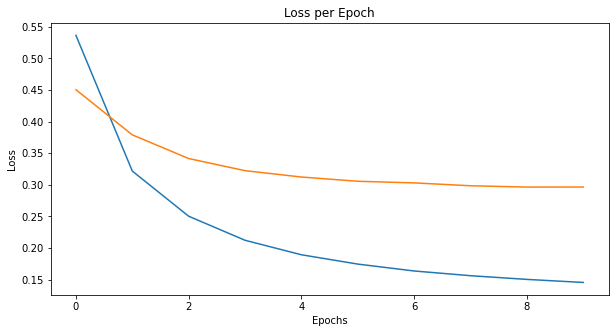

In [27]:
sgdlog.plot()

### Neural Network

In [28]:
class Neuron:
    
    def __init__(self):
        """ Initializes the Neuron """
        pass
    
    def forward(self, xi):
        """ Defines the foward pass of the neuron """
        pass
    
    def backward(self, xi, gradient, rate):
        """ Defines the backward pass for the neuron """
        pass
    

class ReLU(Neuron):
    
    def __init__(self):
        """ Initializes the Neuron """
        pass
    
    def forward(self, xi):
        """ Defines the ReLU function """
        return np.maximum(0, xi)
    
    def backward(self, xi, gradient, rate):
        """ Defines the gradient for the ReLU function """
        relu_g = xi > 0
        backpass = gradient * relu_g
        return backpass
        

class Tanh(Neuron):
    
    """ This was a thought, but it was not actually used """
    
    def __init__(self):
        """ Initializes the Neuron """
        pass
    
    def forward(self, xi):
        """ Defines the Tanh function """
        return np.tanh(xi)
    
    def backward(self, xi, gradient, rate):
        """ Defines the gradient for the Tanh function """
        backpass = (1 - np.square(np.tanh(xi))) * gradient
        return backpass
    

class Softmax(Neuron):
     
    def __init__(self):
        """ Initializes the Neuron """
        pass

    def forward(self, xi):
        """ Defines the Softmax function """
        exps = np.exp(xi - np.max(xi))  # Adding np.max(xi) for numeric stability
        return exps / np.sum(exps, axis=1, keepdims=True)
    
    def backward(self, xi, gradient, rate):
        """ Defines the gradient for the Softmax function """
        sm = self.forward(xi) 
        backpass = (sm - gradient) / xi.shape[0]  # Assume the gradient is one-hot encoded y
        return backpass
    

class Layer(Neuron):
    
    def __init__(self, xdim: int, ydim: int):
        """ Initializes the class """
        # Bias is assumed to be a feature for simplification purposes
        self._he_init = np.sqrt((2 / (xdim + ydim)))  # Initialize the weights with He initialization scheme
        self.w_ = np.random.normal(scale = self._he_init, size = (xdim, ydim))
        
    def forward(self, xi) -> np.ndarray:
        """ Performs the linear matrix operation for the layer """
        return xi.dot(self.w_)
    
    def backward(self, xi, gradient, rate):
        """ Performs the backward pass for the layer """
        # Mini-batch stochastic descent
        cost = xi.T.dot(gradient) / xi.shape[0]  # Assumes mini-batch stochastic gradient-descent 
        self.w_ -= rate * cost
        
        # Gradient for Input
        xi_gradient = gradient.dot(self.w_.T)
        return xi_gradient
    

class Network:
    
    def __init__(self, learning_rate: float = 0.1, max_epochs: int = 1000, precision: float = 1E-6, 
                 batch_size: int = None):
        """ Initializes the Network """
        self.network = []
        self.rate = learning_rate
        self.epochs = max_epochs
        self.precision = precision
        self.b_ = batch_size
        self.loss_ = None
        self.val_loss_ = None
        self.get_loss = None
        self.get_gradient = None
    
    def add_layer(self, layer) -> None:
        """ Adds a layer to the network """
        self.network.append(layer)
    
    def loss(self, func, func_prime):
        """ Sets the loss to use for the network """
        self.get_loss = func
        self.get_gradient = func_prime
            
    def predict(self, X) -> np.ndarray:
        """ Defines the predict function """
        results = self._feed_forward(X)
        return results[-1]
    
    def score(self, X, y) -> float:
        """ Scores the predictive ability of the Network """
        results = self.predict(X)
        labels = np.argmax(results, axis=1)
        y = np.argmax(y, axis=1)
        return sum(labels == y) / len(labels)
    
    def fit(self, X: np.ndarray, y: np.ndarray, X_val: np.ndarray = None, y_val: np.ndarray = None,
            verbose: bool = True):
        """ Fits the network to the training vectors """
        self.loss_ = list()
        self.val_loss_ = list()
        for i in range(self.epochs):
            n, d = X.shape
            rand_indices = np.random.permutation(n)
            xi = X[rand_indices, :]
            yi = y[rand_indices, :]
            
            loss = self._train(xi, yi)
            self.loss_.append(loss)
            
            val_loss = None
            if X_val is not None and y_val is not None:
                preds = self.predict(X_val)
                val_loss = -self.get_loss(preds, y_val)
                self.val_loss_.append(val_loss)
            
            if verbose:
                print(f"Loss at epoch {i} is {loss}")
                if val_loss:
                    print(f"Val Loss at epoch {i} is {val_loss}")
            
            if i > 0 and abs(self.loss_[i-1] - loss) <= self.precision:
                print(f"Precision reached at epoch {i}")
                break
    
    def plot(self) -> None:
        """ Plots the loss """
        epochs = len(self.loss_)
        fig = plt.figure(figsize=(10, 5))
        plt.plot(range(epochs), self.loss_)
        if self.val_loss_:
            plt.plot(range(epochs), self.val_loss_)
        plt.title('Loss per Epoch')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()
    
    def _train(self, xi: np.ndarray, yi: np.ndarray) -> float:
        """ Implements mini-batch stochastic gradient descent """
        n, _ = xi.shape
        iters = int(n / self.b_)
        epoch_loss = 0.
        start = 0
        for k in range(iters):
            end = start + self.b_
            x = xi[start:end, :]
            y = yi[start:end, :]
            outputs = self._feed_forward(x)
            result = outputs[-1]
            
            loss = self.get_loss(result, y)
            epoch_loss += loss
            
            g = self.get_gradient(result, y)
            self._backward_pass(outputs, g)
            start = end
        return -epoch_loss / iters
        
    def _feed_forward(self, xi) -> np.ndarray:
        """ Feeds the sample forward through the network """
        outputs = [None] * (len(self.network) + 1)
        outputs[0] = xi
        for i, layer in enumerate(self.network):
            xi = layer.forward(xi)
            outputs[i + 1] = xi
        return outputs
    
    def _backward_pass(self, outputs, gradient) -> None:
        """ Implements a backward pass through the network """
        for i in range(len(outputs) - 1)[::-1]:
            xi = outputs[i]
            layer = self.network[i]
            gradient = layer.backward(xi, gradient, self.rate)

In [29]:
def cross_entropy_loss(x, y) -> float:
    """ Returns the loss of cross entropy logistic regression """
    loss = np.sum(np.multiply(y, np.log(x))) / x.shape[0]
    return loss

def cross_entropy_loss_g(x, y) -> np.ndarray:
    """ Returns gradient of loss for network """
    return y  # Only return y because the output layer has the gradient

In [30]:
def build_network(xdim: int, ydim: int, epochs: int = 30, batch_size = 12, neurons: int = 50) -> tuple:
    """ Gets everything ready to start """
    net = Network(0.1, max_epochs = epochs, batch_size = batch_size)
    net.add_layer(Layer(xdim, neurons))
    net.add_layer(ReLU())
    net.add_layer(Layer(neurons, ydim))
    net.add_layer(Softmax())
    net.loss(cross_entropy_loss, cross_entropy_loss_g)
    return net

In [31]:
net = build_network(tf_train.shape[1], y_train.shape[1], epochs = 10, neurons = 50)
net.fit(tf_train, y_train, tf_val, y_val)

Loss at epoch 0 is 0.9334193230465163
Val Loss at epoch 0 is 0.8771864163578239
Loss at epoch 1 is 0.8683628656825066
Val Loss at epoch 1 is 0.8565615129964343
Loss at epoch 2 is 0.847777392702398
Val Loss at epoch 2 is 0.834220833062421
Loss at epoch 3 is 0.8220085634377051
Val Loss at epoch 3 is 0.8059114957205875
Loss at epoch 4 is 0.7901032447112497
Val Loss at epoch 4 is 0.7726117623764177
Loss at epoch 5 is 0.7515885498547554
Val Loss at epoch 5 is 0.7300621954387776
Loss at epoch 6 is 0.7080881752431525
Val Loss at epoch 6 is 0.6846287599651413
Loss at epoch 7 is 0.662309170479113
Val Loss at epoch 7 is 0.6405366960295249
Loss at epoch 8 is 0.6177167652624634
Val Loss at epoch 8 is 0.5983260169287447
Loss at epoch 9 is 0.5769404054540711
Val Loss at epoch 9 is 0.5593158403350472


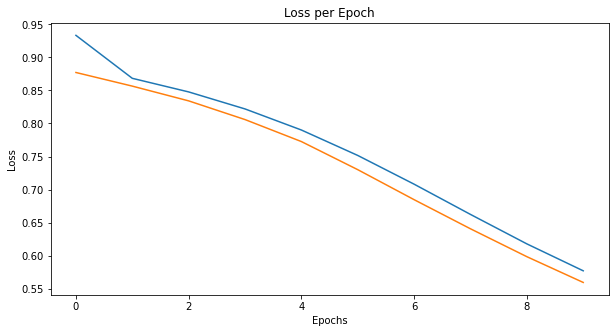

In [32]:
net.plot()

# Sentiment Analysis

In [33]:
def load_file(path: str):
    """ Loads the file into memory """
    with open(path, 'r', encoding='ISO-8859-1') as fo:
        content = fo.read()
    return content

def clean_data(lines: list):
    """ Cleans the data for tokenization """
    cleaned = list()
    for line in lines:
        # Lowercase text and remove leading and ending newlines
        line = line.lower().strip('\n')
        # Fix any encoding issues
        line = normalize('NFD', line).encode('utf8')
        line = line.decode('utf8')
        # Remove new line symbols
        line = line.replace('\n', ' ')
        # Remove special characters and numbers
        line = re.sub("[^a-z\s\']+", " ", line).replace("'", "")
        # Remove whitespace
        line = ' '.join(line.split())
        cleaned.append(line)
    return np.array(cleaned)

In [34]:
review_match = re.compile(r"((?:\<review_text\>)([\s\w\S]+?)(?:\<\/review_text\>))")

pos = load_file('q2/positive.review')
neg = load_file('q2/negative.review')
pos_reviews = [r.group(2) for r in review_match.finditer(pos)]
neg_reviews = [r.group(2) for r in review_match.finditer(neg)]

In [35]:
len(pos_reviews), len(neg_reviews), pos_reviews[0:5]

(1000,
 1000,
 ["\nBridget Jones, modern day woman, brillant and doesn't know it, prone to accidents and mess ups but manages to come out of them.  \n\nThis is the book that started it all with the chick lit fever.  Bridget Jones is my hero! \n",
  "\nI am ordering copies for all 23 middle school principals and the two assistant principals leading two middle school programs in the Milwaukee Public Schools system. We will use Wheatley's book as the primary resource  for our professional growth at our MPS Middle School Principals  Collaborative institute August 9-11, 1999. We are not just concerned with  reform; we seek renewal as well. Wheatley provides the basis. She notes  that Einstein said that  a problem cannot be solved from the same  consciousness that created it. The entire book is a marvelous exploration  of this philosophy\n",
  '\nAs a casual piano player and a Broadway fanatic, I was so jazzed to play some of the songs from Avenue Q. The book contains everything you find on 

In [36]:
pos_cleaned = clean_data(pos_reviews)
neg_cleaned = clean_data(neg_reviews)

pos_labels = np.ones(len(pos_cleaned))
neg_labels = np.zeros(len(neg_cleaned))

pos_cleaned.shape, neg_cleaned.shape

((1000,), (1000,))

In [37]:
n_train = int(pos_cleaned.shape[0] * .8)
n_val = int(pos_cleaned.shape[0] * .2)

indices = np.random.permutation(range(pos_cleaned.shape[0]))
train_indices = indices[:n_train-n_val]
val_indices = indices[n_train-n_val:n_train]
test_indices = indices[n_train:]

assert train_indices.shape[0] + val_indices.shape[0] + test_indices.shape[0] == 1000

pos_train, y_pos_train = pos_cleaned[train_indices], pos_labels[train_indices]
neg_train, y_neg_train = neg_cleaned[train_indices], neg_labels[train_indices]

pos_val, y_pos_val = pos_cleaned[val_indices], pos_labels[val_indices]
neg_val, y_neg_val = neg_cleaned[val_indices], neg_labels[val_indices]


pos_test, y_pos_test = pos_cleaned[test_indices], pos_labels[test_indices]
neg_test, y_neg_test = neg_cleaned[test_indices], neg_labels[test_indices]

X_train[20:25]

array(['close to you murmured mitya kissing her dress her bosom her hands and suddenly he had a strange fancy it seemed to him that she was looking straight before her not at him not into his face but over his head with an intent almost uncanny fixity an expression of wonder almost of alarm came suddenly into her face',
       'an hours complete leisure for such reflections as these on a dark november day a small thick rain almost blotting out the very few objects ever to be discerned from the windows was enough to make the sound of lady russells carriage exceedingly welcome and yet though desirous to be gone she could not quit the mansion house or look an adieu to the cottage with its black dripping and comfortless veranda or even notice through the misty glasses the last humble tenements of the village without a saddened heart scenes had passed in uppercross which made it precious it stood the record of many sensations of pain once severe but now softened and of some instances of rel

In [38]:
X_train, y_train = np.hstack((pos_train, neg_train)), np.hstack((y_pos_train, y_neg_train))
X_val, y_val = np.hstack((pos_val, neg_val)), np.hstack((y_pos_val, y_neg_val))
X_test, y_test = np.hstack((pos_test, neg_test)), np.hstack((y_pos_test, y_neg_test))

n = len(pos_cleaned) + len(neg_cleaned)
print(X_train.shape[0] + X_val.shape[0] + X_test.shape[0])
assert X_train.shape[0] + X_val.shape[0] + X_test.shape[0] == n
assert y_train.shape[0] + y_val.shape[0] + y_test.shape[0] == n
X_train[0:5], y_train[0:5]

2000


(array(['what can i say more spidey than you can shake a stick at for peanuts if you ever wished you had the patience to cut out and neatly collect all the sunday paper comics in a nice neat scrap book then this is the book for you im planning on buying the lot and thoroughly enjoying my strolls down memory lane',
        'if your looking to increase your personal level of joy and harmony in life implement the teachings of the frames in this book manny padro salt lake city uta',
        'i have read this book daily for almost years the original book given to me in is somewhat worn and now i require a replacement it has been and will remain my first reading each day',
        'i have been planting flowers from seed in my home for almost years now last year i had over seedlings on multi level shelves under flourescent and natural light in my dining room boy do i need a greenhouse so this book was not a lot of new information to me a lot of what is listed can be found on the back of a see

In [39]:
max_seq_length = max(len(line.split()) for line in data)
max_seq_length

2681

In [40]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
seqs = tokenizer.texts_to_sequences(X_train)
X_train_pad = pad_sequences(seqs, maxlen=max_seq_length, padding='post')

In [41]:
seqs = tokenizer.texts_to_sequences(X_val)
X_val_pad = pad_sequences(seqs, maxlen=max_seq_length, padding='post')

seqs = tokenizer.texts_to_sequences(X_val)
X_test_pad = pad_sequences(seqs, maxlen=max_seq_length, padding='post')

X_val_pad.shape, X_test_pad.shape

((400, 2681), (400, 2681))

In [42]:
embeddings_index = {}
with open("/tmp/glove.6B.100d.txt") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [43]:
num_tokens = len(tokenizer.word_index) + 2
embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 15460 words (1113 misses)


In [46]:
cnn_model = Sequential()
cnn_model.add(
    Embedding(
        num_tokens,
        embedding_dim,
        embeddings_initializer=Constant(embedding_matrix),
        trainable=False,
        input_length=max_seq_length
    )
)
cnn_model.add(ZeroPadding1D(3))
cnn_model.add(Conv1D(128, 4, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 2681, 100)         1657500   
_________________________________________________________________
zero_padding1d_2 (ZeroPaddin (None, 2687, 100)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2684, 128)         51328     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 1,717,149
Trainable params: 59,649
Non-trainable params: 1,657,500
_______________________________________

In [47]:
cnn_model.compile(optimizer=Adam(lr=1E-3), loss='binary_crossentropy', 
                  metrics=['acc'])

history = cnn_model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val),
                        batch_size=32, epochs=10)

Epoch 1/10
38/38 [==============================] - 1s 16ms/step - loss: 0.7251 - acc: 0.4944 - val_loss: 0.6511 - val_acc: 0.6200
Epoch 2/10
38/38 [==============================] - 0s 13ms/step - loss: 0.5813 - acc: 0.7484 - val_loss: 0.6081 - val_acc: 0.6875
Epoch 3/10
38/38 [==============================] - 0s 13ms/step - loss: 0.4714 - acc: 0.8294 - val_loss: 0.5644 - val_acc: 0.7175
Epoch 4/10
38/38 [==============================] - 0s 13ms/step - loss: 0.3471 - acc: 0.8964 - val_loss: 0.5463 - val_acc: 0.7100
Epoch 5/10
38/38 [==============================] - 0s 13ms/step - loss: 0.2542 - acc: 0.9374 - val_loss: 0.5184 - val_acc: 0.7200
Epoch 6/10
38/38 [==============================] - 0s 13ms/step - loss: 0.1693 - acc: 0.9783 - val_loss: 0.4949 - val_acc: 0.7725
Epoch 7/10
38/38 [==============================] - 1s 14ms/step - loss: 0.0826 - acc: 0.9939 - val_loss: 0.5040 - val_acc: 0.7850
Epoch 8/10
38/38 [==============================] - 1s 13ms/step - loss: 0.0460 - a

In [48]:
lstm_model = Sequential()
lstm_model.add(Embedding(
        num_tokens,
        embedding_dim,
        embeddings_initializer=Constant(embedding_matrix),
        trainable=False,
        input_length=max_seq_length
))
lstm_model.add(LSTM(256, return_sequences=True))
lstm_model.add(GlobalMaxPooling1D())
lstm_model.add(Dense(128, activation='relu'))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 2681, 100)         1657500   
_________________________________________________________________
lstm_2 (LSTM)                (None, 2681, 256)         365568    
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 2,056,093
Trainable params: 398,593
Non-trainable params: 1,657,500
_________________________________________________________________


In [49]:
lstm_model.compile(optimizer=Adam(lr=1E-3), loss='binary_crossentropy', 
                  metrics=['acc'])

history = lstm_model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val),
                         batch_size=32, epochs=10)

Epoch 1/10
38/38 [==============================] - 5s 104ms/step - loss: 0.6859 - acc: 0.5623 - val_loss: 0.6633 - val_acc: 0.5950
Epoch 2/10
38/38 [==============================] - 4s 103ms/step - loss: 0.6437 - acc: 0.6179 - val_loss: 0.5730 - val_acc: 0.7275
Epoch 3/10
38/38 [==============================] - 4s 98ms/step - loss: 0.5107 - acc: 0.7684 - val_loss: 0.5028 - val_acc: 0.7775
Epoch 4/10
38/38 [==============================] - 4s 98ms/step - loss: 0.4422 - acc: 0.7890 - val_loss: 0.4908 - val_acc: 0.7700
Epoch 5/10
38/38 [==============================] - 4s 98ms/step - loss: 0.3053 - acc: 0.8843 - val_loss: 0.4824 - val_acc: 0.7775
Epoch 6/10
38/38 [==============================] - 4s 99ms/step - loss: 0.2333 - acc: 0.9214 - val_loss: 0.4381 - val_acc: 0.8150
Epoch 7/10
38/38 [==============================] - 4s 98ms/step - loss: 0.1561 - acc: 0.9667 - val_loss: 0.4707 - val_acc: 0.8125
Epoch 8/10
38/38 [==============================] - 4s 98ms/step - loss: 0.0991 -

In [50]:
lstm_model = Sequential()
lstm_model.add(Embedding(
        num_tokens,
        embedding_dim,
        embeddings_initializer=Constant(embedding_matrix),
        trainable=False,
        input_length=max_seq_length
))
lstm_model.add(LSTM(256, return_sequences=False))
lstm_model.add(Dense(128, activation='relu'))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 2681, 100)         1657500   
_________________________________________________________________
lstm_3 (LSTM)                (None, 256)               365568    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total params: 2,056,093
Trainable params: 398,593
Non-trainable params: 1,657,500
_________________________________________________________________


In [51]:
lstm_model.compile(optimizer=Adam(lr=1E-3), loss='binary_crossentropy', 
                  metrics=['acc'])

history = lstm_model.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val),
                         batch_size=32, epochs=10)

Epoch 1/10
38/38 [==============================] - 5s 104ms/step - loss: 0.6931 - acc: 0.5290 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 2/10
38/38 [==============================] - 4s 97ms/step - loss: 0.6929 - acc: 0.5131 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 3/10
38/38 [==============================] - 4s 97ms/step - loss: 0.6932 - acc: 0.5086 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 4/10
38/38 [==============================] - 4s 97ms/step - loss: 0.6909 - acc: 0.5025 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 5/10
38/38 [==============================] - 4s 96ms/step - loss: 0.6918 - acc: 0.5190 - val_loss: 0.6937 - val_acc: 0.5000
Epoch 6/10
38/38 [==============================] - 4s 97ms/step - loss: 0.6905 - acc: 0.5230 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 7/10
38/38 [==============================] - 4s 97ms/step - loss: 0.6925 - acc: 0.4930 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 8/10
38/38 [==============================] - 4s 97ms/step - loss: 0.6931 - 